**Etivity 4: Mauel prediction**

In [143]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


**Data Laden und in DataFrame umwandeln 1.2.1**

In [113]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

test_points = {
    'i1': (0.1, 0.2),
    'i2': (0.4, 0.5),
    'i3': (0.6, 0.6)
}

**Radius mean und textue mean definieren**

In [114]:
df_subset = df[['mean radius', 'mean texture', 'target']]
df_subset.columns = ['radius_mean', 'texture_mean', 'target']

**Zielsplante in M/B umwandeln**

In [115]:
df_subset['target'] = df_subset['target'].map({0: 'M', 1: 'B'})

print(df_subset.head())

   radius_mean  texture_mean target
0        17.99         10.38      M
1        20.57         17.77      M
2        19.69         21.25      M
3        11.42         20.38      M
4        20.29         14.34      M


/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_3896/1082411979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['target'] = df_subset['target'].map({0: 'M', 1: 'B'})


**Skalieren -  K-NN basiert auf Distanzen – unterschiedliche Wertebereiche würden zu einer Verzerrung führen**

In [116]:
scaler = MinMaxScaler()
df_subset[['radius_mean', 'texture_mean']] = scaler.fit_transform(df_subset[['radius_mean', 'texture_mean']])

/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_3896/3762595280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[['radius_mean', 'texture_mean']] = scaler.fit_transform(df_subset[['radius_mean', 'texture_mean']])


**Visualisieren**

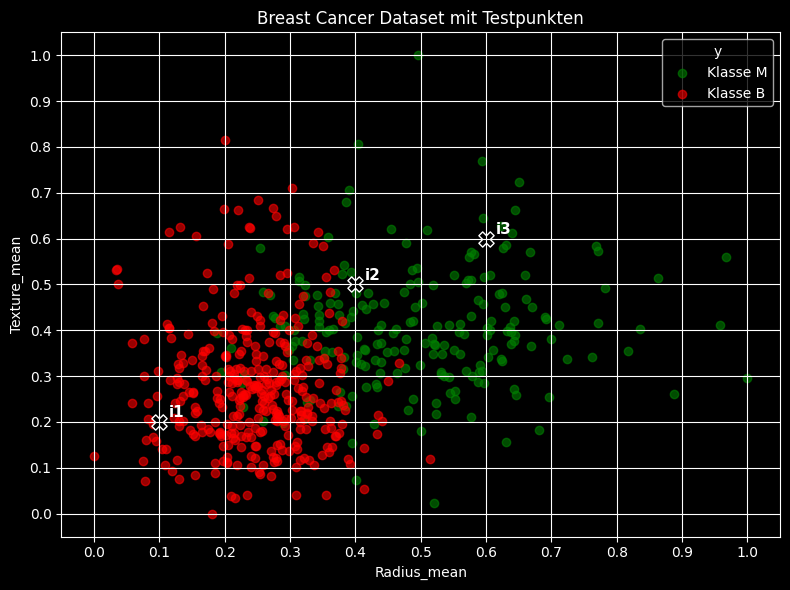

In [133]:
color_map = {'M': 'green', 'B': 'red'}

plt.figure(figsize=(8, 6))


for label in ['M', 'B']:
    subset = df_subset[df_subset['target'] == label]
    plt.scatter(subset['radius_mean'], subset['texture_mean'],
                color=color_map[label], label=f'Klasse {label}', alpha=0.6)


for label, (x, y) in test_points.items():
    plt.scatter(x, y, c='black', marker='X', s=120, edgecolor='white')
    plt.text(x + 0.015, y + 0.01, label, fontsize=11, weight='bold')


plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))


plt.xlabel('Radius_mean')
plt.ylabel('Texture_mean')
plt.title('Breast Cancer Dataset mit Testpunkten')
plt.legend(title="y")
plt.grid(True)
plt.tight_layout()
plt.show()

**Modell trainieren**

fit() speichert die Trainingsdaten intern. Bei k=1 entscheidet die einzige nächstgelegene Instanz über die Vorhersage

In [134]:
from sklearn.neighbors import KNeighborsClassifier

X = df_subset[['radius_mean', 'texture_mean']]
y = df_subset['target']

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

**Vorhersage machen**

In [135]:
X_test = np.array([
    [0.1, 0.2],  # i1
    [0.4, 0.5],  # i2
    [0.6, 0.6]   # i3
])

y_pred = model.predict(X_test)

for i, label in enumerate(y_pred, 1):
    print(f"i{i}: {label}")

i1: B
i2: M
i3: M


/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Artificial Neural Network (ANN) 1.3.1**

1.	Zwei Eingaben: radius_mean, texture_mean
2.	Eine lineare Kombination = hidden layer output (H): H = radius\_mean \cdot 1.7 + texture\_mean \cdot 0.58 - 1.12
3.	Zwei Ausgänge (linear): C1(M) = H \cdot (-1.14) + 0.22
	C2(B) = H \cdot (+1.14) + 0.78

	Die Klasse mit dem höheren Wert (C1 oder C2) soll als Vorhersage genommen

**Funktion predict_ann() definieren**

In [136]:
def predict_ann(x):
    # Hidden Layer Berechnung
    h = x[0] * 1.7 + x[1] * 0.58 - 1.12

    # Output Layer
    c_m = h * -1.14 + 0.22
    c_b = h * 1.14 + 0.78

    return "M" if c_m > c_b else "B"

**Vorhersage**

In [137]:
for name, coords in test_points.items():
    prediction = predict_ann(coords)
    print(f"{name}: {prediction}")

i1: M
i2: B
i3: B


**Airqualiy dataset regression 2.2.1**

Predict the temperature (ŷ) for the following instances using K-NN with k = 1

In [ ]:

air_test_points = {
    'i1': (0.1, 0.2),
    'i2': (0.5, 0.1),
    'i3': (1.0, 0.8)
}

predictions_knn = {
    'i1': 79,
    'i2': 83,
    'i3': 73
}

for label in air_test_points:
    print(f"{label}: Vorhergesagte Temperatur = {predictions_knn[label]}°F")

i1: Vorhergesagte Temperatur = 79°F
i2: Vorhergesagte Temperatur = 83°F
i3: Vorhergesagte Temperatur = 73°F


**Artificial Neural Network (ANN) Regression – Temperaturvorhersage mit linearem Netz 2.3.1**

In [142]:
def predict_airquality_ann(x):
    # Hidden layer
    h = x[0] * 1.46 + x[1] * -4.2 + 12.69
    # Output layer
    y = h * 5.49 + 13.32
    return y

for label, coords in air_test_points.items():
    y_pred = predict_airquality_ann(coords)
    print(f"{label}: vorhergesagte Temperatur = {y_pred:.2f}°F")

i1: vorhergesagte Temperatur = 79.18°F
i2: vorhergesagte Temperatur = 84.69°F
i3: vorhergesagte Temperatur = 72.56°F
